In [1]:
from qiskit.tools.jupyter import *
from qiskit import IBMQ
IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider=IBMQ.get_provider(hub='ibm-q-research', group='uni-maryland-1', project='main')

In [2]:
backend = provider.get_backend('ibmq_rome')
backend_config = backend.configuration()
backend_defaults = backend.defaults()
assert backend_config.open_pulse, "Backend doesn't support Pulse"

In [3]:
inst_sched_map=backend_defaults.instruction_schedule_map

In [4]:
print(inst_sched_map)

<InstructionScheduleMap(1Q instructions:
  q0: {'x', 'u3', 'id', 'u1', 'sx', 'measure', 'u2', 'rz'}
  q1: {'x', 'u3', 'id', 'u1', 'sx', 'measure', 'u2', 'rz'}
  q2: {'x', 'u3', 'id', 'u1', 'sx', 'measure', 'u2', 'rz'}
  q3: {'x', 'u3', 'id', 'u1', 'sx', 'measure', 'u2', 'rz'}
  q4: {'x', 'u3', 'id', 'u1', 'sx', 'measure', 'u2', 'rz'}
Multi qubit instructions:
  (0, 1): {'cx'}
  (1, 0): {'cx'}
  (1, 2): {'cx'}
  (2, 1): {'cx'}
  (2, 3): {'cx'}
  (3, 2): {'cx'}
  (3, 4): {'cx'}
  (4, 3): {'cx'}
  (0, 1, 2, 3, 4): {'measure'}
)>


In [5]:
from qiskit.visualization.pulse_v2 import draw

In [6]:
from qiskit import execute

In [7]:
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns")    # The configuration returns dt in seconds, so multiply by
                                        # 1e9 to get nanoseconds

Sampling time: 0.2222222222222222 ns


In [8]:
import numpy as np
from qiskit import pulse            # This is where we access all of our Pulse features!
from qiskit.pulse import Play
# This Pulse module helps us build sampled pulses for common pulse shapes
from qiskit.pulse import library as pulse_lib
from pulsecalibration import PulseCalibration as PulseCali

In [19]:
%load_ext autoreload

In [90]:
%autoreload

In [36]:
PC=PulseCali(backend=backend,qubit=0)

In [37]:
print(backend_defaults.qubit_freq_est)

[4968706220.291689, 4770096456.256269, 5015163187.856112, 5259208800.043839, 4997546601.021806]


/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


Executing the Frequency sweep job for 0->1 transition.
Job Status: job has successfully run
The frequency-signal plot for frequency sweep: 


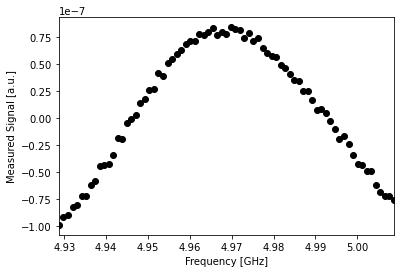

The frequency-signal plot for frequency sweep: 


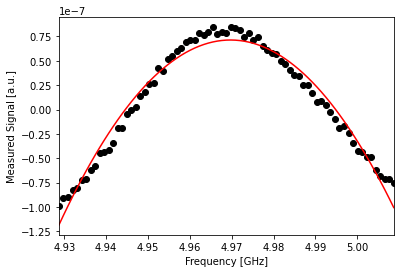

The calibrate frequency for the 0->1 transition is 4969690956.131442


In [45]:
f01=PC.find_freq_ground(verbose=True,visual=True)

In [46]:
f01_1=PC.get_qubit_freq_ground()
f01_1

4969690956.131442

In [47]:
PC=PulseCali(backend=backend,qubit=0,qubit_freq_ground=f01)

/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


Executing the rabi oscillation job to get Pi pulse for 0->1 transition.
Job Status: job has successfully run
The Pi amplitude of 0->1 transition is 0.17262375496379606.
The amplitude-signal plot for rabi oscillation for 0->1 transition.


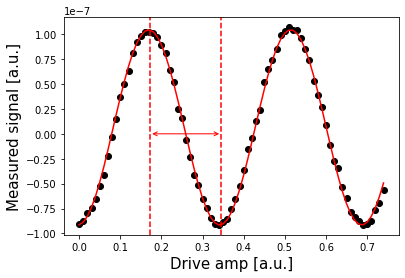

In [48]:
amp01=PC.find_pi_amp_ground(verbose=True,visual=True)

In [49]:
amp01_1=PC.get_pi_amp_ground()
amp01_1

0.17262375496379606

In [55]:
PC=PulseCali(backend=backend,qubit=0,qubit_freq_ground=f01,pi_amp_ground=amp01)

/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


Executing the Frequency sweep job for 1->2 transition.
Job Status: job has successfully run
The frequency-signal plot of frequency sweep for 1->2 transition.


/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


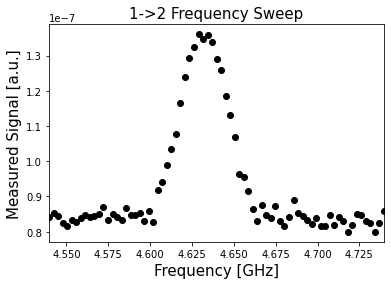

/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


The frequency-signal plot of frequency sweep for 1->2 transition.


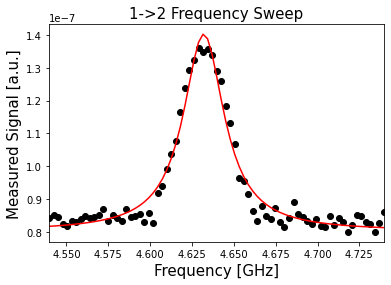

The calibrated frequency for the 1->2 transition                     is 4631981984.580682.


In [56]:
f12=PC.find_freq_excited(verbose=True,visual=True)

In [84]:
PC=PulseCali(backend=backend,qubit=0,qubit_freq_ground=f01,pi_amp_ground=amp01,qubit_freq_excited=f12)

In [85]:
f12_1=PC.get_qubit_freq_excited()
f12_1

4631981984.580682

/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


Executing the rabi oscillation job for 1->2 transition.
Job Status: job has successfully run
The amplitude-signal plot of rabi oscillation for 1->2 transition.


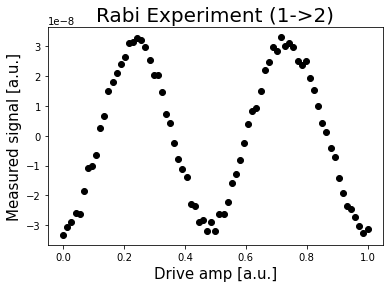

The amplitude-signal plot of rabi oscillation for 1->2 transition.


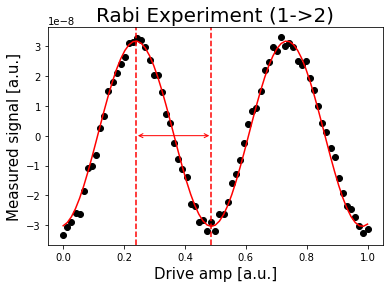

In [86]:
amp12=PC.find_pi_amp_excited(verbose=True,visual=True)

In [87]:
amp12_1=PC.get_pi_amp_excited()
amp12_1

0.23876386254363524

## T1 for 1 -->0 transition

In [91]:
PC=PulseCali(backend,0,qubit_freq_ground=f01,qubit_freq_excited=f12,
             pi_amp_ground=amp01, pi_amp_excited=amp12)

Job Status: job has successfully run


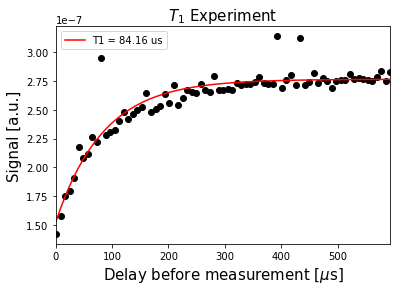

8.415817546979031e-05

In [92]:
PC.T1_ground(verbose=True,visual=True)

/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


Job Status: job has successfully run


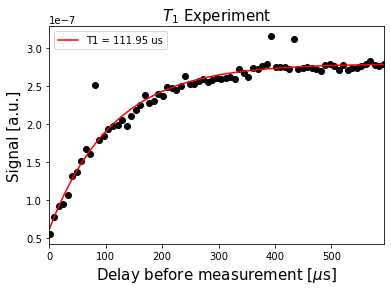

0.00011194721542359708

In [93]:
PC.T1_excited(verbose=True,visual=True)

/Users/mingtsoweii/miniconda3/lib/python3.8/site-packages/qiskit/compiler/assembler.py:309: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn("Dynamic rep rates are supported on this backend. 'rep_delay' will be "


Job Status: job has successfully run


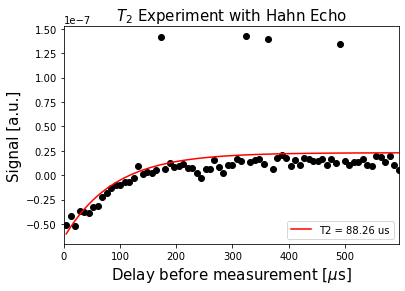

8.825832072268945e-05

In [94]:
PC.T2_ground(verbose=True,visual=True)